In [103]:
import os,sys,cv2
import tuning_fork as tfork
import matplotlib.pyplot as plt
import numpy as np
def bg_remove(img,t=0.01):
    def _check(f, rng):
        for i in rng:
            if f(i):
                return i
    x = img
    sx = _check(lambda i: np.mean(x[i, :] != 0) >= t, range(x.shape[0]))
    ex = _check(lambda i: np.mean(x[i, :] != 0) >= t, reversed(range(x.shape[0])))
    sy = _check(lambda i: np.mean(x[:, i] != 0) >= t, range(x.shape[1]))
    ey = _check(lambda i: np.mean(x[:, i] != 0) >= t, reversed(range(x.shape[1])))
    return img[sx:ex+1, sy:ey+1]
    

RMV/best_39_f64.0 estimated error in hz 329.62755691286986 vs 329.44781591146995 in tones 64.0 vs 63.99055726363988.png 0


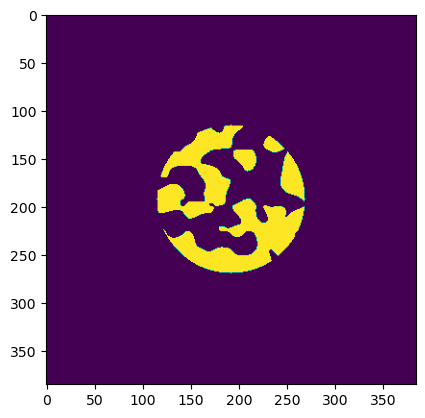

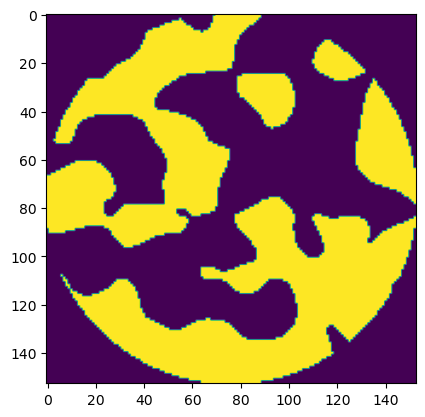

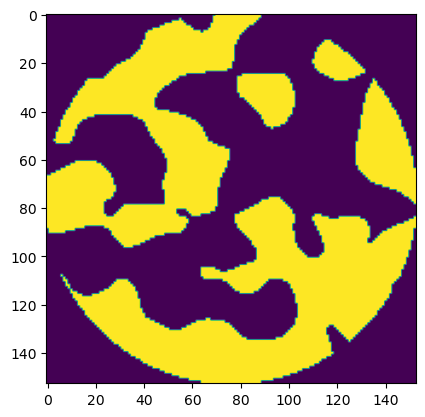

RMV/best_42_f66.0 estimated error in hz 369.9944227116344 vs 369.9676905733384 in tones 66.0 vs 65.99874913628112.png 1


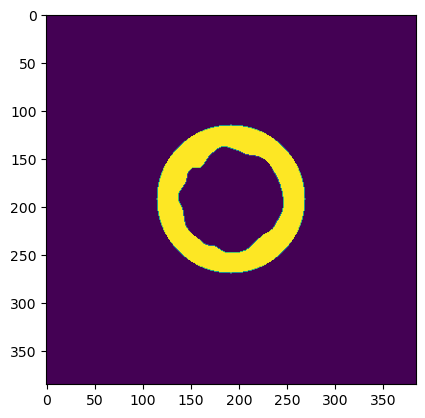

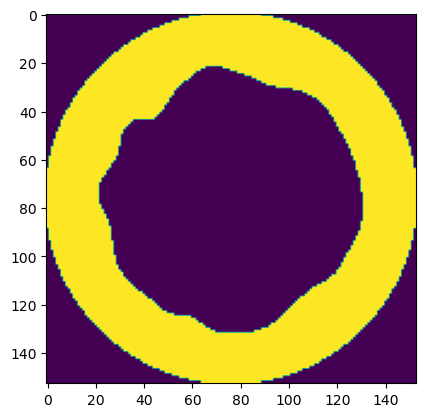

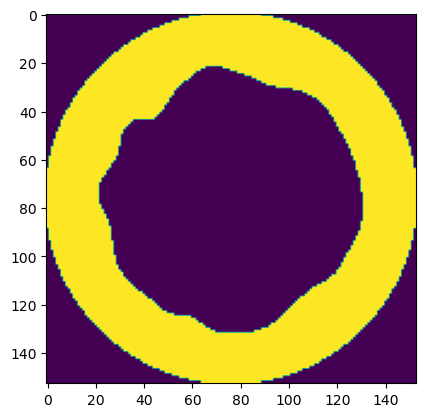

RMV/best_11_f329.6275569128699.png 2


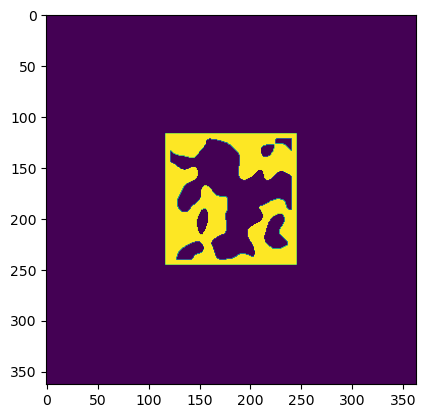

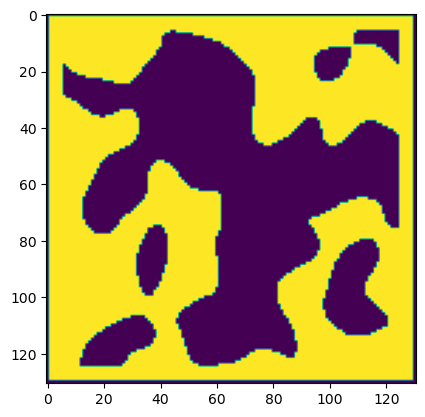

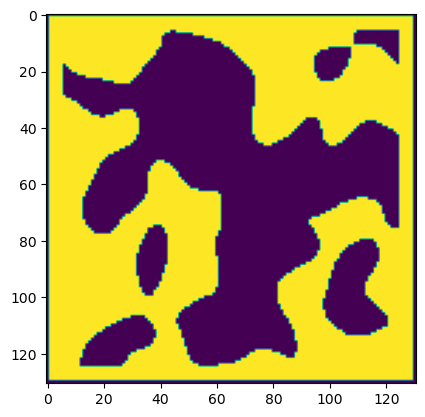

RMV/70 iters estimated error in hz 261.6255653005987 vs 261.6192164158665 in tones 60.0 vs 59.99957987520157.png 3


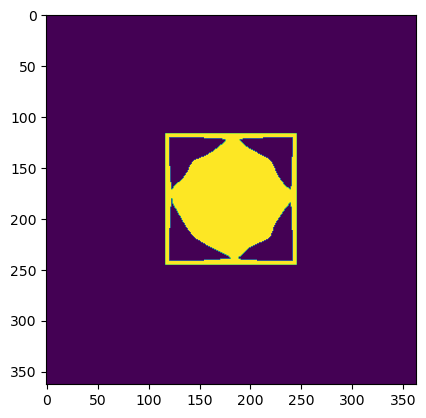

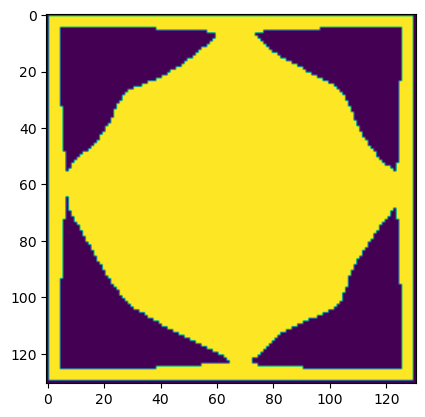

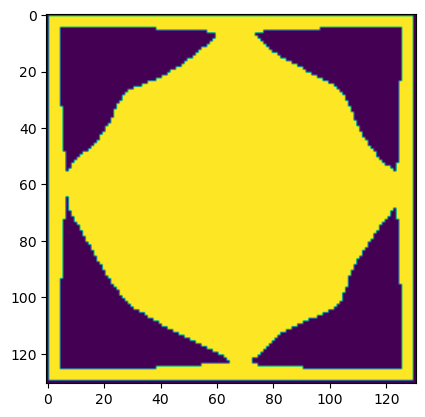

RMV/best_33_f66.0 estimated error in hz 369.9944227116344 vs 370.00227776275034 in tones 66.0 vs 66.00036754034014.png 4


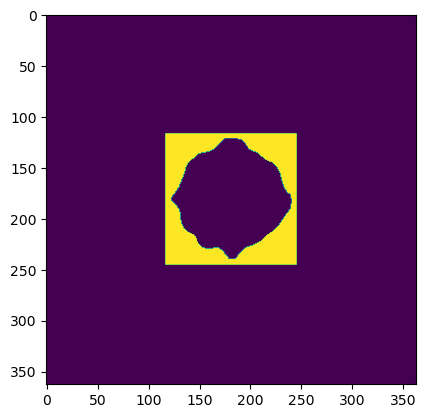

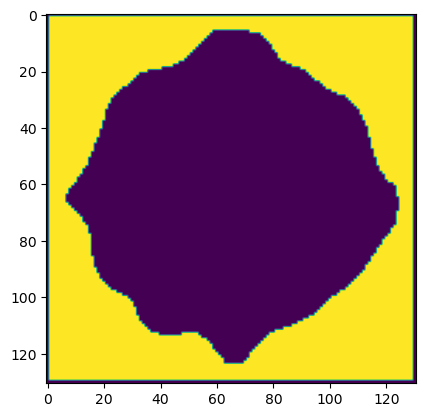

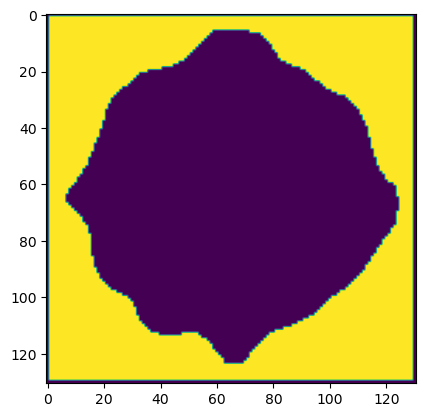

RMV/estimated error in hz 261.6255653005987 vs 261.65best_65_f60.0.png 5


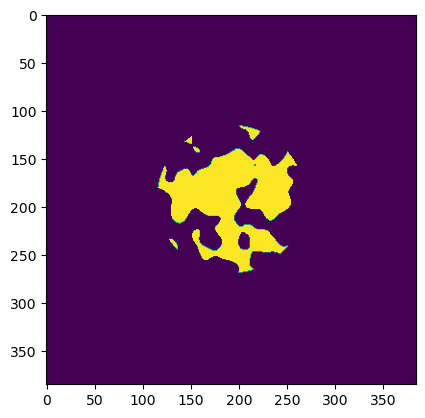

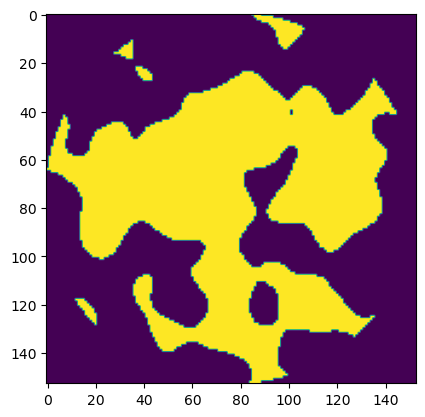

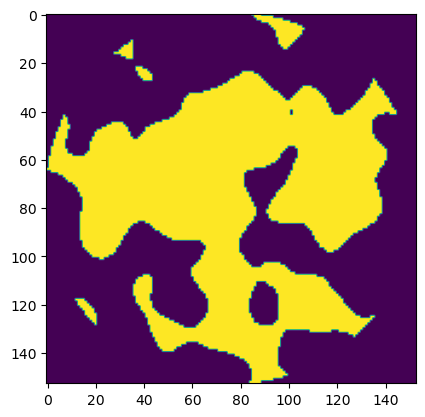

RMV/estimated error in hz 349.2282314330039 vs 349.01best_59_f65.0.png 6


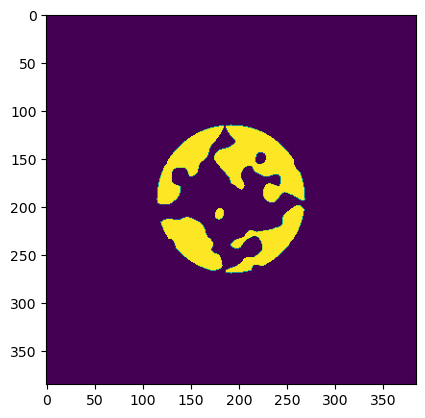

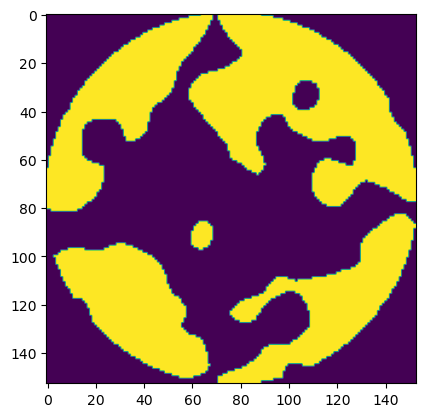

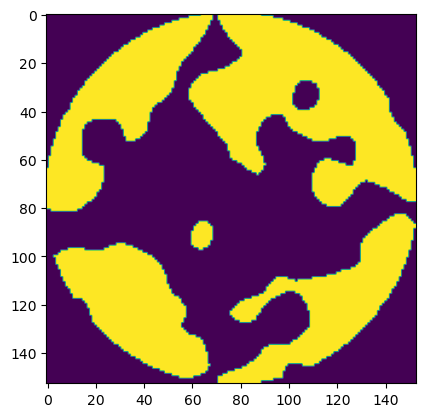

In [100]:
pimgs = [x for x in os.listdir("./RMV") if x.endswith("png")]
_t = 0.001
ts = [0,0,0.0,0,0,0,0]
val = 11
ds = [0,0,
      (val,val,val,val),
      (val,val,val,val),
      (val,val,val,val),
      0,0]
imgs = []
res = -1
for t, d, pimg in zip(ts,ds,pimgs):
    pimg = os.path.join("RMV", pimg)
    if not pimg.endswith("png"): continue
    print(pimg, len(imgs))
    img = cv2.imread(pimg)[:,:,1]
    img = (img > 128) * 255.
    # img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    img = bg_remove(img,t)
    if d != 0:
        if isinstance(d, tuple):
            x1,x2,y1,y2 = d
        else:
            x1 = x2 = y1 = y2 = d
        img = img[x1:-x2,y1:-y2]
    plt.imshow(img)
    plt.show()
    d = 116
    m = img[d:-d, d:-d]
    plt.imshow(m); plt.show()
    if res > 0: m = cv2.resize(m, (res,res), interpolation = cv2.INTER_NEAREST)
    plt.imshow(m); plt.show()
    imgs.append(m)


In [102]:
for i, m in enumerate(imgs):
    print(i)
    p = os.path.join("RMV", "stls", f"{i}.stl")
    thickness = 4
    prong_length = 1024

    mat = tfork.gen_voxel(m, prong_length, thickness, close_sides=True, sides_thickness=5, handle_length=None)
    tfork.np2stl(mat, p)
    # tfork.show_voxel(path=p) 


0
1
2
3
4
5
6


In [49]:
# H, W=[32,32] # H, W
# m = tfork.sample_m(H, W)
thickness = 4
prong_length = 128

mat = tfork.gen_voxel(m, prong_length, thickness, close_sides=True, sides_thickness=5, handle_length=None)
tfork.np2stl(mat, "tuning-fork.stl")
tfork.show_voxel(path="tuning-fork.stl") 



ModuleNotFoundError: No module named 'skimage'